In [85]:
# Analysis script that tests and compares the filtering algorithms used in PyBirales
# 
# Possible analysis
#  1. Analyse the typical noise of the instrument. 
#      What is it's distribution?
#      Does it change on when the transmitter is on off?
#  2. Calculate the probability of false detection for a given set of filters.
#      Use a data set with noise only and run it through the filtering pipeline
#      Compare filters with the same "square law detector". 
#         See how Pd falls when more filters are applied.
#         See how processing time increases as more filters are applied. 
#         See how both metrics reduce as a function of SNR
#      Justify the filtering choice based on these metrics
#  3. Compare how you can assess the 'information loss' of a track after filtering


In [89]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from astropy.io import fits
from astropy.table import Table
import analysis
from analysis import sns
import os

In [90]:
ROOT = "/home/denis/.birales/visualisation/fits"
FITS_FILE = "Observation_2019-01-05T1320/Observation_2019-01-05T1320_raw_5.fits"
OUT_DIR = "/home/denis/.birales/visualisation/analysis"
SAVE_FIGURES = False

In [125]:
hdu_list = fits.open(os.path.join(ROOT, FITS_FILE))
image_data = hdu_list[0].data.byteswap().newbyteorder()[0] # get 1 beam
print ('Data shape: {} channels and {} samples'.format(image_data.shape[0], image_data.shape[1]))

Data shape: 8192 channels and 1600 samples


(8192, 1600)
(8192,)


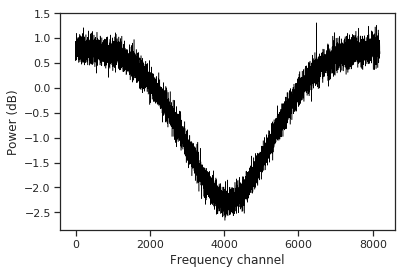

In [108]:
# 1. Noise values (averaged in time) per channel
time_sample = 471
power = np.mean(image_data,axis=1)

ax = sns.lineplot(x=channels, y=power, sort=False, lw=0.5, color='black')
ax.set(xlabel='Frequency channel', ylabel='Power (dB)')

if SAVE_FIGURES:
    plt.savefig(OUT_DIR+'/bandpass.pdf')

In [109]:
from scipy.ndimage import binary_hit_or_miss

class Filters:
    
    def background_noise(data):        
        noise_estimate = np.sqrt(np.mean(np.power(data,2), axis=2))
        std = np.std(data)
        
        # Calculate the threshold at which the noise will be clipped
        t2 = 5 * std + noise_estimate
        
        # re-shape threshold array so to make it compatible with the data
        t2 = np.expand_dims(t2, axis=2)

        data[data < t2] = 0.
        
    def pepper_noise(data, o):
        _structure = np.zeros((3, 3))
        _structure[1, 1] = 1
        
        return binary_hit_or_miss(data, structure1=_structure)


Noise threshold: 34.0786531726 dB
(0,)


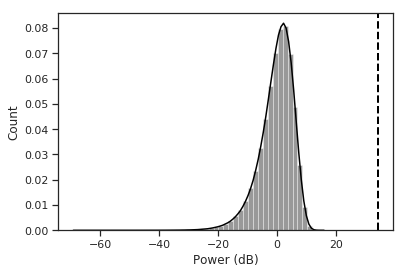

In [121]:
# Show noise distribution (histogram) and clipping threshold

data = image_data

noise_estimate = np.sqrt(np.mean(np.power(data,2), axis=1)) # noise estimate integrated over time samples
std = np.std(data)
channel_threshold = 5*std +  noise_estimate
threshold = np.mean(channel_threshold)


ax2 = sns.distplot(data.flatten(), color='black')
ax2.set(xlabel='Power (dB)', ylabel='Count')   
ax2.axvline(x=threshold, ymin=0, ymax=1, linewidth=2,linestyle='dashed', color='black')

print "Noise threshold is {} dB".format(threshold)

if SAVE_FIGURES:
    plt.savefig(OUT_DIR+'/noise_distribution.pdf')

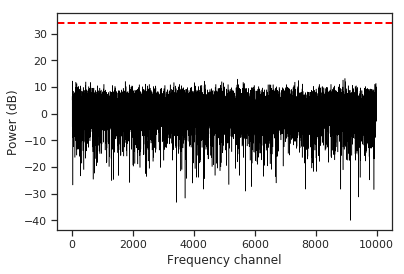

In [123]:
power = image_data.flatten()[: 10000]
samples = range(0, len(power))

ax = sns.lineplot(x=samples, y=power, sort=False, lw=0.5, color='black')

ax.set(xlabel='Frequency channel', ylabel='Power (dB)')
ax.axhline(y=threshold, linewidth=2,linestyle='dashed', color='red')

In [ ]:
# Calculate the probability of false detection (Pfa)

In [ ]:
# Calculate the probability of false detection 